In [2]:
import h5py


In [3]:
h5_file = h5py.File(
    f"/home/mdelafuente/batch_processing/pipeline/training/lc_classifier_ztf/ATAT_ALeRCE/data/datasets/ZTF_ff/final/LC_MD_FEAT_240627_windows_200_12/dataset.h5", "r"
)

In [4]:
h5_file.keys()

<KeysViewHDF5 ['SNID', 'extracted_feat_1024', 'extracted_feat_128', 'extracted_feat_16', 'extracted_feat_2048', 'extracted_feat_256', 'extracted_feat_32', 'extracted_feat_512', 'extracted_feat_64', 'flux', 'flux_err', 'labels', 'mask', 'mask_detection', 'mask_photometry', 'metadata_feat', 'test', 'time', 'time_detection', 'time_photometry', 'training_0', 'validation_0']>

In [5]:
for key in h5_file.keys():
    print(h5_file.get(f'{key}'))

<HDF5 dataset "SNID": shape (252810,), type "|O">
<HDF5 dataset "extracted_feat_1024": shape (252810, 181), type "<f8">
<HDF5 dataset "extracted_feat_128": shape (252810, 181), type "<f8">
<HDF5 dataset "extracted_feat_16": shape (252810, 181), type "<f8">
<HDF5 dataset "extracted_feat_2048": shape (252810, 181), type "<f8">
<HDF5 dataset "extracted_feat_256": shape (252810, 181), type "<f8">
<HDF5 dataset "extracted_feat_32": shape (252810, 181), type "<f8">
<HDF5 dataset "extracted_feat_512": shape (252810, 181), type "<f8">
<HDF5 dataset "extracted_feat_64": shape (252810, 181), type "<f8">
<HDF5 dataset "flux": shape (252810, 200, 2), type "<f8">
<HDF5 dataset "flux_err": shape (252810, 200, 2), type "<f8">
<HDF5 dataset "labels": shape (252810,), type "<f8">
<HDF5 dataset "mask": shape (252810, 200, 2), type "<f8">
<HDF5 dataset "mask_detection": shape (252810, 200, 2), type "<f8">
<HDF5 dataset "mask_photometry": shape (252810, 200, 2), type "<f8">
<HDF5 dataset "metadata_feat": 

In [6]:
flux_example = h5_file.get('flux')[0]
flux_err_example = h5_file.get('flux_err')[0]
time_example = h5_file.get('time')[0]
print(time_example.shape)

(200, 2)


In [8]:
time_example.shape

(200, 2)

<ErrorbarContainer object of 3 artists>

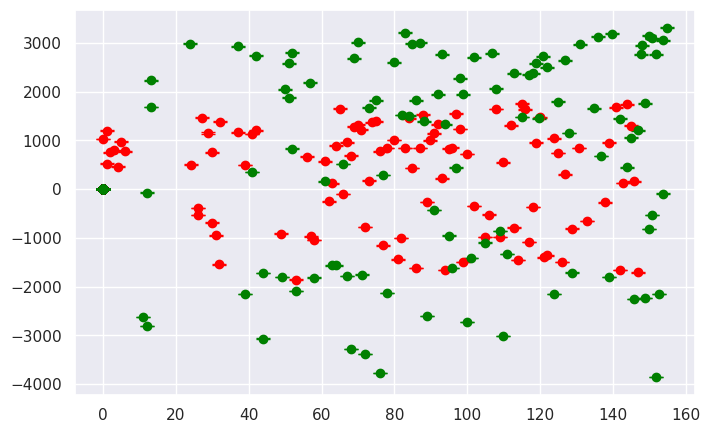

In [45]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid")
 
band_1 = pd.DataFrame(flux_example).iloc[:,0]
band_2 = pd.DataFrame(flux_example).iloc[:,1]
err_1 = pd.DataFrame(flux_err_example).iloc[:,0]
err_2 = pd.DataFrame(flux_err_example).iloc[:,1]

time_1 = pd.DataFrame(time_example).iloc[:,0]
time_2 = pd.DataFrame(time_example).iloc[:,1]

fig,ax = plt.subplots(1,1,figsize = (8,5))
plt.errorbar(x= time_1,y = band_1,yerr =  err_1, linewidth=2, capsize=5, c = 'red',fmt = 'o')
plt.errorbar(x= time_2,y = band_2, yerr = err_2,  linewidth=2, capsize=5,color = 'green',fmt = 'o')


In [7]:
feats_example = h5_file.get('extracted_feat_2048')
metadata_example = h5_file.get('metadata_feat')

In [8]:
feats_example.shape,metadata_example.shape

((252810, 181), (252810, 6))